## Tutorial 3 - Autoencoder Continued Training

In this example, we will demonstrate how a model that has been pretrained can be continued to train with new data. This is useful when you have a model that has been trained on a large dataset, and you want to fine-tune it to a new dataset. BUT, we demonstrate that this is not always a good idea.

In [3]:
import numpy as np

### Load our pretrained model

In [5]:
from tensorflow import keras

pretrained_model = keras.models.load_model('/content/sample_data/initially_trained_autoencoder.h5')

### Load our new symbol and test the autoencoder on this new symbol

1/1 [==============================] - 0s 46ms/step
(1, 784)


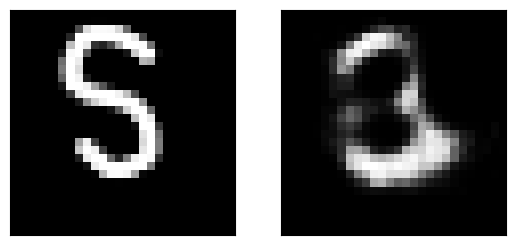

In [7]:
import matplotlib.pyplot as plt

import tensorflow as tf
from tensorflow.keras.preprocessing import image


####################################
# load s1 sample image
image = tf.keras.utils.load_img('/content/sample_data/s1.png', target_size=(28, 28), color_mode = "grayscale")


####################################
# predict an s1 image from this sample
input_arr = tf.keras.utils.img_to_array(image)
input_arr = input_arr/ 255 # normalize between 0 and 1
input_arr = input_arr.reshape(784)
input_arr = np.array([input_arr])  # Convert single image to a batch with one image in it


#####################################################################
####################################
# load s2 sample image
image2 = tf.keras.utils.load_img('/content/sample_data/s2.png', target_size=(28, 28), color_mode = "grayscale")


####################################
# predict an s2 image from this sample
input_arr2 = tf.keras.utils.img_to_array(image2)
input_arr2 = input_arr2/ 255 # normalize between 0 and 1
input_arr2 = input_arr2.reshape(784)
input_arr2 = np.array([input_arr2])  # Convert single image to a batch with one image in it

####################################
# load s3 sample image
image3 = tf.keras.utils.load_img('/content/sample_data/s3.png', target_size=(28, 28), color_mode = "grayscale")


####################################
# predict an image from this sample
input_arr3 = tf.keras.utils.img_to_array(image3)
input_arr3 = input_arr3/ 255 # normalize between 0 and 1
input_arr3 = input_arr3.reshape(784)
input_arr3 = np.array([input_arr3])  # Convert single image to a batch with one image in it

####################################
# load s4 sample image
image4 = tf.keras.utils.load_img('/content/sample_data/s4.png', target_size=(28, 28), color_mode = "grayscale")


####################################
# predict an s4 image from this sample
input_arr4 = tf.keras.utils.img_to_array(image4)
input_arr4 = input_arr4/ 255 # normalize between 0 and 1
input_arr4 = input_arr4.reshape(784)
input_arr4 = np.array([input_arr4])  # Convert single image to a batch with one image in it

####################################
# load s5 sample image
image5 = tf.keras.utils.load_img('/content/sample_data/s5.png', target_size=(28, 28), color_mode = "grayscale")


####################################
# predict an image from this sample
input_arr5 = tf.keras.utils.img_to_array(image5)
input_arr5 = input_arr5/ 255 # normalize between 0 and 1
input_arr5 = input_arr5.reshape(784)
input_arr5 = np.array([input_arr5])  # Convert single image to a batch with one image in it

########################################################################


predictions = pretrained_model.predict(input_arr)
print(predictions.shape)


#####################################
# display the two images side by side
# 
plt.subplot(1,2,1)
plt.xticks([])
plt.yticks([])
plt.grid(False)
plt.imshow(image, cmap="gray")


plt.subplot(1,2,2)
plt.xticks([])
plt.yticks([])
plt.grid(False)
plt.imshow(predictions[0].reshape(28,28), cmap="gray")


plt.show()

As we can, this autoencoder doesn't do a good job with this new symbol.

### Try to continue training the model on the original 10 digits and with the new symbol mixed in   

Let's try to retrain the original model with a mix of the new symbol and the original 10. Our goal it so avoid retraining with the entire original test test, and instead only use a small subset of the original test set.

In [8]:
from tensorflow.keras.datasets import mnist


# load MNIST data
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()
print(train_images.shape)
print(test_images.shape)

# Flatten the images for a autoencoder input (28x28 is 784 -- therfore, input is 784 neurons)
train_images = np.reshape(train_images, (-1, 784))
test_images = np.reshape(test_images, (-1, 784))
print(train_images.shape)
print(test_images.shape)

# Normalize data - since it's grayscale, we can divide by 255 to get each pixel between 0 and 1
train_images = train_images.astype('float32') / 255
test_images = test_images.astype('float32') / 255

11490434/11490434 [==============================] - 0s 0us/step
(60000, 28, 28)
(10000, 28, 28)
(60000, 784)
(10000, 784)


In [9]:
input_arr = input_arr.reshape(784)
input_arr2 = input_arr2.reshape(784)
input_arr3 = input_arr3.reshape(784)
input_arr4 = input_arr4.reshape(784)
input_arr5 = input_arr5.reshape(784)

np.random.shuffle(train_images)

bad_images = [input_arr for _ in range(135)]
bad_images2 = [input_arr2 for _ in range(135)]
bad_images3 = [input_arr3 for _ in range(135)]
bad_images4 = [input_arr4 for _ in range(135)]
bad_images5 = [input_arr5 for _ in range(135)]

input_arr 

new_image_set = np.vstack((train_images[:500], bad_images, bad_images2, bad_images3, bad_images4, bad_images5))
np.random.shuffle(new_image_set)

new_images_train = new_image_set[int(len(new_image_set)*.8):]
new_images_test = new_image_set[int(len(new_image_set)*.2):]

In [10]:
from tensorflow import keras
updated_model = keras.models.load_model('/content/sample_data/initially_trained_autoencoder.h5')

from tensorflow.keras.callbacks import EarlyStopping # EarlyStopping during model training

# Train the autoencoder with MNIST data
early_stop = EarlyStopping(monitor='loss', patience=3, verbose=1)
history = updated_model.fit(
    x=new_images_train, # For autoencoders, both the input and the target are the same
    y=new_images_train, 
    epochs=15, 
    batch_size=128,
    shuffle=True, 
    validation_data=(new_images_test, new_images_test),
    callbacks=[early_stop]
)

Epoch 1/15
2/2 [==============================] - 3s 835ms/step - loss: 0.1227 - val_loss: 0.1063
Epoch 2/15
2/2 [==============================] - 1s 471ms/step - loss: 0.1016 - val_loss: 0.0982
Epoch 3/15
2/2 [==============================] - 0s 387ms/step - loss: 0.0922 - val_loss: 0.0877
Epoch 4/15
2/2 [==============================] - 1s 475ms/step - loss: 0.0822 - val_loss: 0.0833
Epoch 5/15
2/2 [==============================] - 0s 279ms/step - loss: 0.0771 - val_loss: 0.0799
Epoch 6/15
2/2 [==============================] - 0s 252ms/step - loss: 0.0725 - val_loss: 0.0776
Epoch 7/15
2/2 [==============================] - 0s 273ms/step - loss: 0.0701 - val_loss: 0.0764
Epoch 8/15
2/2 [==============================] - 0s 132ms/step - loss: 0.0682 - val_loss: 0.0750
Epoch 9/15
2/2 [==============================] - 0s 140ms/step - loss: 0.0663 - val_loss: 0.0743
Epoch 10/15
2/2 [==============================] - 0s 139ms/step - loss: 0.0650 - val_loss: 0.0736
Epoch 11/15
2/2 [==

In [12]:
updated_model.save('updated_trained_autoencoder.h5')

### Test the model on the original test set

30/30 [==============================] - 0s 7ms/step


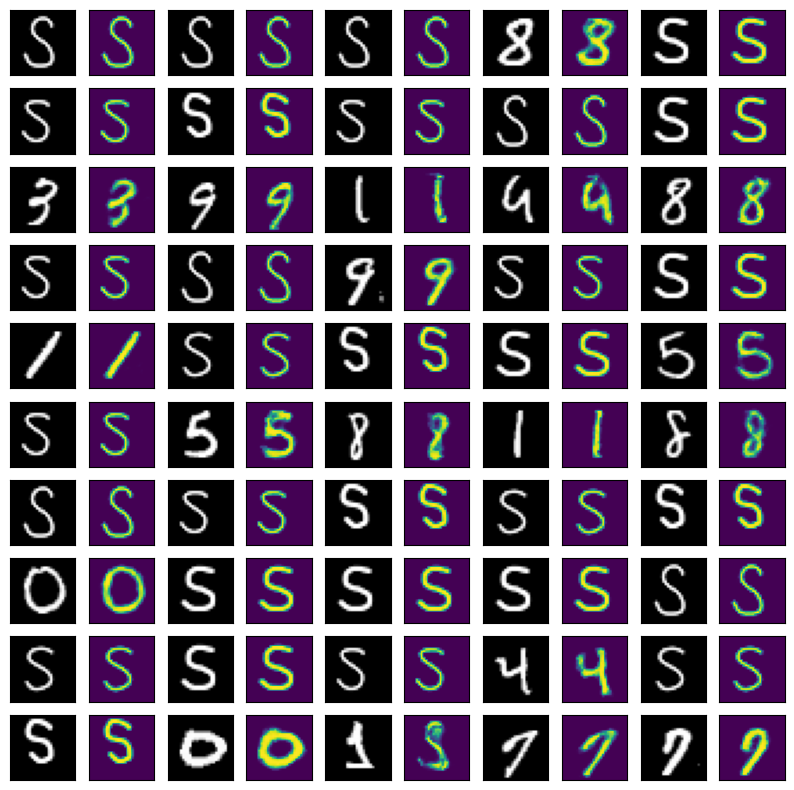

In [13]:
reconstructed_images = updated_model.predict(new_images_test)

images = []
for i in range(100):
    images.append(new_images_test[i].reshape(28,28))
    images.append(reconstructed_images[i].reshape(28,28))
rows = 10
cols = 10
plt.figure(figsize=(10,10))
for i in range(rows*cols):
    plt.subplot(rows,cols,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    if (i%2 == 0):
        plt.imshow(images[i],cmap='gray')
    else:
        plt.imshow(images[i])
plt.show()

### Test the model on the new test set

1/1 [==============================] - 0s 26ms/step
(1, 784)


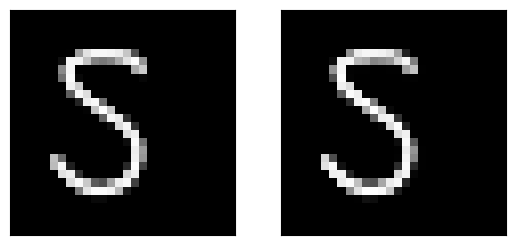

In [14]:
import tensorflow as tf
from tensorflow.keras.preprocessing import image


####################################
# load a sample image
image = tf.keras.utils.load_img('/content/sample_data/s5.png', target_size=(28, 28), color_mode = "grayscale")


####################################
# predict an image from this sample
input_arr = tf.keras.utils.img_to_array(image)
input_arr = input_arr/ 255 # normalize between 0 and 1
input_arr = input_arr.reshape(784)
input_arr = np.array([input_arr])  # Convert single image to a batch with one image in it

predictions = updated_model.predict(input_arr)
print(predictions.shape)


#####################################
# display the two images side by side
# 
plt.subplot(1,2,1)
plt.xticks([])
plt.yticks([])
plt.grid(False)
plt.imshow(image, cmap="gray")


plt.subplot(1,2,2)
plt.xticks([])
plt.yticks([])
plt.grid(False)
plt.imshow(predictions[0].reshape(28,28), cmap="gray")


plt.show()


### Summary 

When the pretrained model of autoencoder is trained and updated on mnist data images and the images (28X28 pixelated) of my name's first letter S, it learns a compressed representation of input data that captures the essential features of it, while discarding the non-essential information. As a result, the model is able to resconstruct the letter S. 
